* This notebook was made to look at tidal heights at Steveston, Deas Island channel, New Westminster and Mission in the jetty bathymetry case.

In [1]:
from __future__ import division
from salishsea_tools import (
    nc_tools,
    viz_tools,
    stormtools,
    tidetools,
)
from salishsea_tools.nowcast import figures
import glob
import os
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
%matplotlib inline

In [2]:
sites = {
    'Sandheads': {
        'lat': 49.10,
        'lon': -123.30,
        'i' : 77, #426 start from 349 fortran start from 350
        'j' : 34, #293 start from 259 fortran start from 260
   
    },
    'Steveston Jetty':{
        'lat': 49.1057,
        'lon': -123.3032,
        'i' :  79,#428
        'j' :  33,#292
    },
    'Deas Island':{
        'lat' : 48.12,
        'lon' : -123.07,
        'i' : 65,#414,
        'j' : 69,#328
    },    
    'New Westminster': {
        'lat': 49.21,
        'lon': -122.89,
        'i': 69,#418,
        'j': 106,#365
        },

    'Mission': {
        'lat': 48.59,
        'lon': -123.2,
        'i':  151,#500,
        'j':108,#367
    },
    'Edge of domain':{
        'lat': 49.580574,
        'lon': -123.01498,
        'i': 151, ##500
        'j': 136, ##395
    },
    'nowcasts edge of domain':{
        'lat': 49.130043,
        'lon': -123.04199,
        'i': 65, ## 414
        'j': 75, ## 334
    },

        }
## location of Steveston from EC is:
#-123.185, 49.1242, so 13km away from
#our location for that in the model 

In [3]:
SITES = {
    'Point Atkinson': {
        'lat': 49.33,
        'lon': -123.25,
        'msl': 3.09,
        'stn_no': 7795,
        'extreme_ssh': 5.61},
    'Victoria': {
        'lat': 48.41,
        'lon': -123.36,
        'msl': 1.8810,
        'stn_no': 7120,
        'extreme_ssh': 3.76},
    'Campbell River': {
        'lat': 50.04,
        'lon': -125.24,
        'msl': 2.916,
        'stn_no': 8074,
        'extreme_ssh': 5.35},
    'Neah Bay': {
        'lat': 48.4,
        'lon': -124.6,
        'stn_no':  9443090},
    'Friday Harbor': {
        'lat': 48.55,
        'lon': -123.016667,
        'stn_no': 9449880},
    'Cherry Point': {
        'lat': 48.866667,
        'lon': -122.766667,
        'stn_no': 9449424},
    'Sandheads': {
        'lat': 49.10,
        'lon': -123.30},
    'Tofino': {
        'stn_no': 8615},
    }

In [4]:
grid_TT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/15days_jetty/1hplumejetty06150629gridT.nc')

In [5]:
t_orig, t_end, t_nemo = figures.get_model_time_variables(grid_TT)

In [6]:
def zoomin_period_tide(grid_T, stn_name, PST , MSL = 0):
    "Find out tide heights and time in PST or UTC \
     given a time series at stations we got our tidal predictions"
    time_shift = datetime.timedelta(hours=-7)# 7hrs in summer, 8hrs 
    #in winter
    t_orig, t_end, t_nemo = figures.get_model_time_variables(grid_T)
    ttide = figures.get_tides(stn_name)
    time = ttide.time + PST * time_shift
    ssh = ttide.pred_all + SITES[stn_name]['msl'] * MSL
    ssh_zoom = []
    time_zoom = []
    for i in np.arange(len(ttide)):
        if (time[i].year == t_orig.year) & (time[i].month == t_orig.month)\
        & (time[i].day >= t_orig.day) & (time[i].day <= t_end.day):
            ssh_zoom.append(ssh[i])
            time_zoom.append(time[i])
    return ssh_zoom, time_zoom, t_orig, t_end

In [7]:
def find_highlow_tide(grid_T, ssh_zoom, time_zoom, t_end, t_orig, PST ):
    "Determine high and low tide heights in PST or UTC at\
    a given day at stations we got our tidal predictions, unit of \
    return ssh_max, ssh_min is feet rather than meter"
    ssh_max = []
    ssh_min = []
    time_max = []
    time_min = []
    j = 0
    for i in np.arange(t_end.day - t_orig.day +1):
        ssh_max.append(max(ssh_zoom[j:j+24])/0.3048)
        ssh_min.append(min(ssh_zoom[j:j+24])/0.3048)
        time_max.append(time_zoom[ssh_zoom.index(max(ssh_zoom[j:j+24]))])  
        time_min.append(time_zoom[ssh_zoom.index(min(ssh_zoom[j:j+24]))]) 
        j = j +24
    return ssh_max, ssh_min, time_max, time_min

In [8]:
def print_out_diff_PA(ssh_max, ssh_min, meter):
    """This function was made to print out
        tidal range in meters/feet
        at Point Atkinson to determine
        which is spring/neap tide in the strait"""
    diff = []
    if meter ==0:
        for i, j in zip(ssh_max,ssh_min):
            dd =i-j
            diff.append(dd)
    elif meter ==1:
        for i, j in zip(ssh_max,ssh_min):
            dd =(i-j)* 0.3048
            diff.append(dd)
    return diff

In [9]:
ssh_zoom, time_zoom, t_orig, t_end = zoomin_period_tide(grid_TT,'Point Atkinson', 0, MSL = 0)

In [10]:
ssh_max,ssh_min,time_max,time_min=find_highlow_tide(grid_TT, ssh_zoom,time_zoom, t_end, t_orig, 0)

In [11]:
diff = print_out_diff_PA(ssh_max,ssh_min, meter =1)
diff ## tidal range at PA in  meters!!! June 24 has the smallest tidal range that I regard it as neap tide

[3.7198760000000002,
 3.8687930000000001,
 3.918593,
 3.8374999999999999,
 3.7140400000000002,
 3.42435,
 3.1029149999999999,
 2.7207910000000002,
 2.530821,
 2.2094269999999998,
 2.2002399999999995,
 2.4000440000000003,
 2.6093839999999999,
 2.867623,
 3.1096960000000005]

In [12]:
##combine both max and min tidal anomaly for Point Atkinson
ssh_obs = []
ssh_obs.append(ssh_max)
ssh_obs.append(ssh_min)

# For new river channel model results(jetty bathymetry10)

In [13]:
ssh_mod = grid_TT.variables['sossheig']
time_mod = grid_TT.variables['time_counter'][:]

In [14]:
ssh_mod.shape

(360, 170, 138)

In [15]:
t = nc_tools.timestamp(grid_TT, np.arange(time_mod.shape[0]))
for ind in range(len(t)):
    t[ind] = t[ind].datetime
tt = np.array(t) ## convert time_counter into datetime

In [16]:
def readoff_stn_highlow_waterlevel(t_end, t_orig, jnd, ind, ssh_mod, time_mod):
    """This function was used to read through high and low water\
        levels at various stns during a time period, the water levels\
        returned are in feet unit instead of meters"""
    ssh_mod_max = []
    ssh_mod_min = []
    time_mod_max = []
    time_mod_min = []
    j = 0
    for i in np.arange(t_end.day - t_orig.day +1):
        ssh_mod_max.append(max(ssh_mod[j:j+23, jnd, ind])/0.3048)
        ssh_mod_min.append(min(ssh_mod[j:j+23, jnd, ind])/0.3048)
        time_mod_max.append(time_mod[j:j+23][np.argmax(ssh_mod[j:j+23, jnd, ind])])  
        time_mod_min.append(time_mod[j:j+23][np.argmin(ssh_mod[j:j+23, jnd, ind])]) 
        ## need to convert time_mod_min in hour to date!!
        j = j +24
    return ssh_mod_max, ssh_mod_min, time_mod_max, time_mod_min  

In [17]:
def readoff_stn_highlow_waterlevel_new(t_end, t_orig, jnd, ind, ssh_mod, tt):
    """This function was used to read through high and low water\
        levels at various stns during a time period, the water levels\
        returned are in feet unit instead of meters"""
    ssh_mod_max = []
    ssh_mod_min = []
    time_mod_max = []
    time_mod_min = []
    j = 0
    for i in np.arange(t_end.day - t_orig.day +1):
        ssh_mod_max.append(max(ssh_mod[j:j+23, jnd, ind])/0.3048)
        ssh_mod_min.append(min(ssh_mod[j:j+23, jnd, ind])/0.3048)
        time_mod_max.append(tt[j:j+23][np.argmax(ssh_mod[j:j+23, jnd, ind])])  
        time_mod_min.append(tt[j:j+23][np.argmin(ssh_mod[j:j+23, jnd, ind])]) 
        ## need to convert time_mod_min in hour to date!!
        j = j +24
    return ssh_mod_max, ssh_mod_min, time_mod_max, time_mod_min 

In [18]:
def get_time_lag( ttmin, time_min, ttma, time_max ):
    """This function was made to calculate time lag
        of high and low water level between stns and 
        PA"""
    delta_min = []
    delta_max = []
    for t1, t2, t3, t4 in zip( ttmin, time_min,ttma, time_max):
        diff_min = (t1.hour- t2.hour) * 60 + (t1.minute - t2.minute)
        diff_max = (t3.hour- t4.hour) * 60 + (t3.minute - t4.minute)
        if diff_min <= -720:
            diff_min = 24*60 + diff_min
        if diff_max >= 720:
            diff_max = 24*60 - diff_max
        delta_min.append(diff_min)
        delta_max.append(diff_max)
    return delta_max, delta_min

In [19]:
def print_out_diff_wl(mima, mimi):
    """To print out difference of high and low
        water levels at each Fraser gauge for
        both models and obs from EC
        Input: mima & mimi are high & low water
        levels for stn.
        Output: array of their difference[unit feet]"""
    df = []
    for i, j in zip(mima, mimi):
        d = i -j
        df.append(d)
    return df

In [20]:
def plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, stn):
    """This function was made to plot water level height
    and time lag for Fraser gauges with PA tidal height """
    fig, axs = plt.subplots(1,2, figsize = (20,10))
    axs[0].scatter(ssh_model,ssh_obs,color='blue',s=15,edgecolor='none')
    axs[0].text(-2, 4, r'$Q_Hope = 200,000cfs$', fontsize=15)
    axs[0].grid()
    axs[0].set_xlim([-8, 14])
    axs[0].set_ylim([-10, 6])
    axs[0].set_xlabel('Water level at ' + stn + ' [feet]')
    axs[0].set_ylabel('Point Atkinson Height[feet]')
    axs[1].scatter(time_lag_mod,ssh_obs,color='blue',s=15,edgecolor='none')
    axs[1].grid()
    #ax.set_xlim([4.5, 9.5])
    #ax.set_ylim([-10, 6])
    axs[1].set_xlabel('Time lag at ' + stn + ' [Minute]')
    axs[1].set_ylabel('Point Atkinson Height[feet]')
    return fig

* New Westminster

In [21]:
## use another time counts[69,106]
tma, tmi, ttma, ttmin = readoff_stn_highlow_waterlevel_new(t_end, t_orig, 69, 106,ssh_mod, tt)

In [22]:
##combine both max and min water level for NEW WESTMINSTER
ssh_model = []
ssh_model.append(tma)
ssh_model.append(tmi)

In [23]:
df = print_out_diff_wl(tma, tmi)
df

[9.113270153836627,
 9.996415631664707,
 10.662322321276026,
 10.87307304222127,
 10.792161496918345,
 9.9398528184164849,
 9.4624483601001916,
 8.9734955018586682,
 7.8775960551159274,
 6.6433084781557872,
 6.5697175193959332,
 7.1143505610818929,
 7.6693096968132677,
 8.0334919253046433,
 8.4789961654683097]

In [24]:
## average, max and min of the tidal amplitude at NW
ddf = np.array(df)
mean_ddf_NW = np.mean(ddf)* 0.3048
max_ddf_NW = np.max(ddf)* 0.3048
min_ddf_NW = np.min(ddf)* 0.3048
print ('Max amplitude of model: {0:.4}'.format(max_ddf_NW))
print ('Min amplitude of model: {0:.4}'.format(min_ddf_NW))
print ('Mean amplitude of model: {0:.4}'.format(mean_ddf_NW))

Max amplitude of model: 3.314
Min amplitude of model: 2.002
Mean amplitude of model: 2.686


In [25]:
delta_max, delta_min = get_time_lag(ttmin, time_min, ttma, time_max)

* For spring tidal range in the strait about 4.0m, 50min delay at New Westminster.

In [26]:
delta_max

[90, 30, 30, 30, 30, 30, 30, 30, 30, 30, 90, 30, 30, 90, 30]

* For neap tidal range in the strait about 2m, 100min delay at New Westminster.

In [27]:
delta_min

[150, 150, 90, 90, 90, 30, 150, 90, 30, 30, 90, 90, 150, 90, 90]

In [28]:
##combine both time lag for high and low water level at NEW WESTMINSTER
time_lag_mod = []
time_lag_mod.append(delta_max)
time_lag_mod.append(delta_min)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


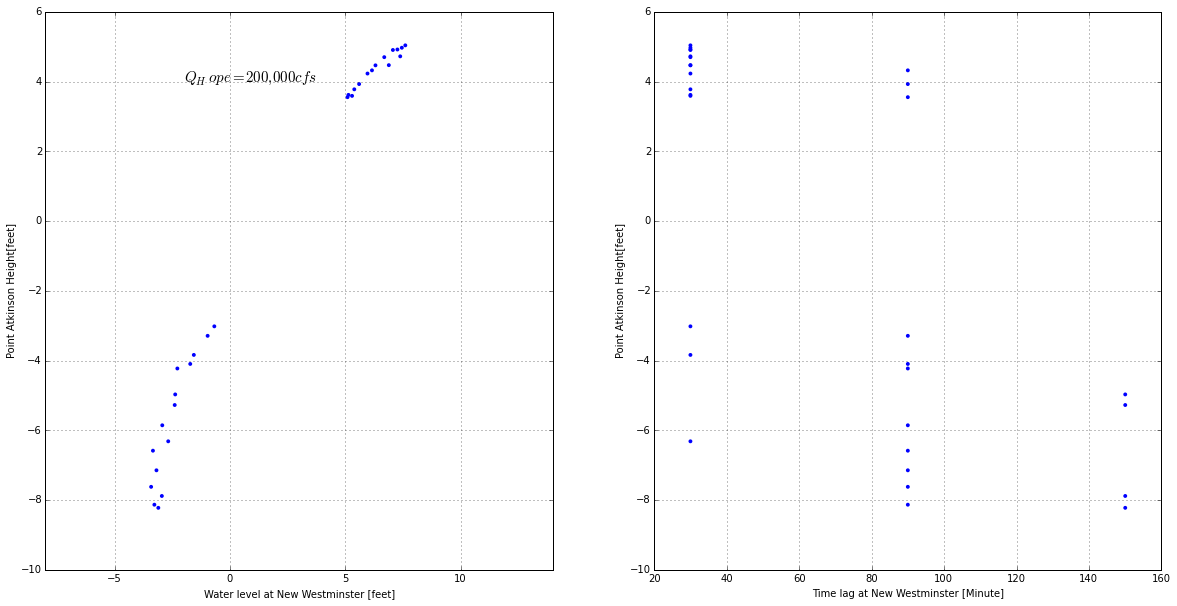

In [29]:
fig = plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, 'New Westminster')

* Mission

In [30]:
## grid cell for Mission is [151, 108]
mima, mimi, tmima, tmimi = readoff_stn_highlow_waterlevel_new(t_end, t_orig, 151, 108,ssh_mod, tt)

In [31]:
##combine both max and min water level for MISIION
ssh_model = []
ssh_model.append(mima)
ssh_model.append(mimi)

In [32]:
df = print_out_diff_wl(mima, mimi)
df

[8.8864487652077759,
 10.162148125997678,
 11.007762135170262,
 11.043462931640503,
 10.858030104887455,
 11.033289858049606,
 10.295953611376405,
 9.4585364141802142,
 8.1587326651795955,
 6.728713202664232,
 6.7821113276448139,
 7.3277530825044224,
 7.7241704141686904,
 8.1878413600245796,
 8.648966788619834]

In [33]:
## average, max and min of the tidal amplitude at Mission
ddf = np.array(df)
mean_ddf_MI = np.mean(ddf)* 0.3048
max_ddf_MI = np.max(ddf)* 0.3048
min_ddf_MI = np.min(ddf)* 0.3048
print ('Max amplitude of model: {0:.4}'.format(max_ddf_MI))
print ('Min amplitude of model: {0:.4}'.format(min_ddf_MI))
print ('Mean amplitude of model: {0:.4}'.format(mean_ddf_MI))

Max amplitude of model: 3.366
Min amplitude of model: 2.051
Mean amplitude of model: 2.77


In [34]:
delta_max, delta_min = get_time_lag(tmimi, time_min, tmima, time_max)

* 190min delay for high water in the Ages model at Mission

In [35]:
delta_max

[90, 30, 30, 90, 30, 30, 90, 30, 90, 30, 90, 90, 90, 90, 90]

* 370min delay for low water in the Ages model at Mission

In [36]:
delta_min

[210, 210, 150, 90, 210, 150, 150, 90, 90, 90, 150, 150, 210, 150, 150]

In [37]:
##combine both time lag for high and low water level at Mission
time_lag_mod = []
time_lag_mod.append(delta_max)
time_lag_mod.append(delta_min)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


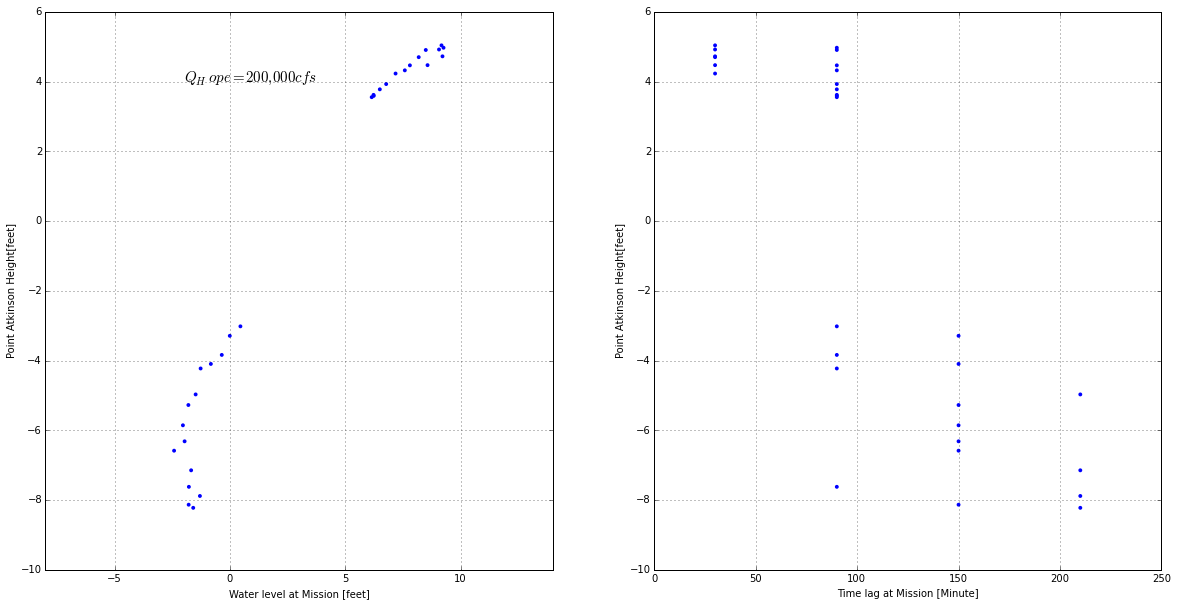

In [38]:
fig = plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, 'Mission')

* Tide nearly no dissipation

* Deas Island channel

In [39]:
## grid cell for Deas Island is [65,69]
mima, mimi, tmima, tmimi = readoff_stn_highlow_waterlevel_new(t_end, t_orig, 65, 69,ssh_mod, tt)

In [40]:
##combine both max and min water level for DEAS ISLAND
ssh_model = []
ssh_model.append(mima)
ssh_model.append(mimi)

In [41]:
df = print_out_diff_wl(mima, mimi)
df

[10.756287440227398,
 11.270101771267068,
 11.710836662082222,
 11.696292581207796,
 11.390119478145609,
 10.622733143058035,
 9.7910344131349571,
 8.255949835451883,
 7.6929739923301952,
 6.7758831999746203,
 6.9875002220233906,
 7.6389821182711541,
 8.3979811724715354,
 9.096080236860459,
 9.5481748186697182]

In [42]:
## average, max and min of the tidal amplitude at Deas Island channel for model
ddf = np.array(df)
mean_ddf_DI = np.mean(ddf)* 0.3048
max_ddf_DI = np.max(ddf)* 0.3048
min_ddf_DI = np.min(ddf)* 0.3048
print ('Max amplitude of model: {0:.4}'.format(max_ddf_DI))
print ('Min amplitude of model: {0:.4}'.format(min_ddf_DI))
print ('Mean amplitude of model: {0:.4}'.format(mean_ddf_DI))

Max amplitude of model: 3.569
Min amplitude of model: 2.065
Mean amplitude of model: 2.878


In [43]:
delta_max, delta_min = get_time_lag(tmimi, time_min, tmima, time_max)

* 10min delay at Deas Island for spring tide with tidal range of 5m at PA.

In [44]:
delta_max

[30, 30, -30, 30, 30, -30, 30, 30, 30, 30, 30, 30, -30, 30, 30]

* 70min delay at Deas Island for neap tides with tidal range of 0.5m at PA.

In [45]:
delta_min

[90, 30, 30, -30, 30, 30, 30, -30, 30, 30, 30, 30, 30, 30, 30]

In [46]:
##combine both time lag for high and low water level at Deas Island
time_lag_mod = []
time_lag_mod.append(delta_max)
time_lag_mod.append(delta_min)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


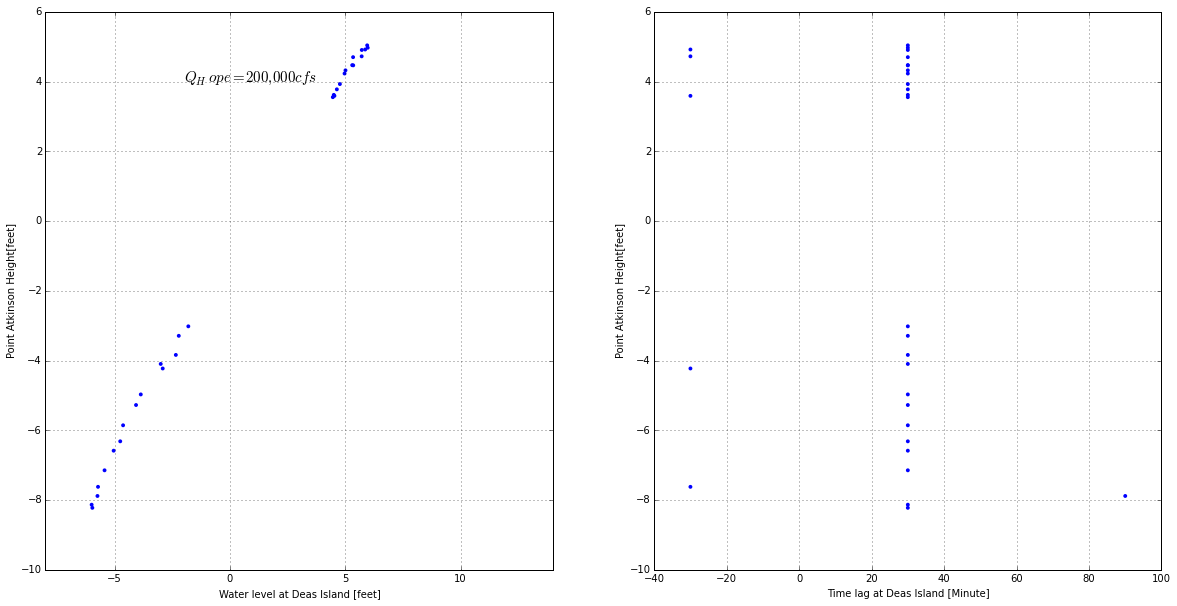

In [47]:
fig = plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, 'Deas Island')

* Steveston Jetty

In [48]:
## grid cell for Steveston Jetty is [79, 33] in theory, but I select [79,32] 
##original grid cell I set as jetty.
mima, mimi, tmima, tmimi = readoff_stn_highlow_waterlevel_new(t_end, t_orig, 79, 32,ssh_mod, tt)

In [49]:
##combine both max and min water level for Steveston Jetty
ssh_model = []
ssh_model.append(mima)
ssh_model.append(mimi)

In [50]:
df = print_out_diff_wl(mima, mimi)
df

[11.612667733915835,
 11.784677977949929,
 12.115450121286347,
 12.051465473775789,
 11.425521273625492,
 10.765521466888469,
 9.6708633924719543,
 8.3598373286680285,
 7.3601581214919802,
 6.5485528838916087,
 6.9869016333827814,
 7.6772194365503896,
 8.6124225707817565,
 9.2286176568879856,
 9.9056583689892381]

In [51]:
## average, max and min of the tidal amplitude at Steveston for model
ddf = np.array(df)
mean_ddf_ST = np.mean(ddf)* 0.3048
max_ddf_ST = np.max(ddf)* 0.3048
min_ddf_ST = np.min(ddf)* 0.3048
print ('Max amplitude of model: {0:.4}'.format(max_ddf_ST))
print ('Min amplitude of model: {0:.4}'.format(min_ddf_ST))
print ('Mean amplitude of model: {0:.4}'.format(mean_ddf_ST))

Max amplitude of model: 3.693
Min amplitude of model: 1.996
Mean amplitude of model: 2.928


In [52]:
delta_max, delta_min = get_time_lag(tmimi, time_min, tmima, time_max)

* 5min delay at Steveston for spring tide with tidal range of 5m at PA.

In [53]:
delta_max

[30, -30, -30, 30, -30, -30, 30, -30, 30, -30, 30, 30, -30, 30, -30]

* 25min delay at Steveston for spring tide with tidal range of 5m at PA.

In [54]:
delta_min

[30, 30, -30, -30, 30, -30, 30, -30, 30, 30, 30, -30, 30, -30, -30]

In [55]:
##combine both time lag for high and low water level at Steveston Jetty
time_lag_mod = []
time_lag_mod.append(delta_max)
time_lag_mod.append(delta_min)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


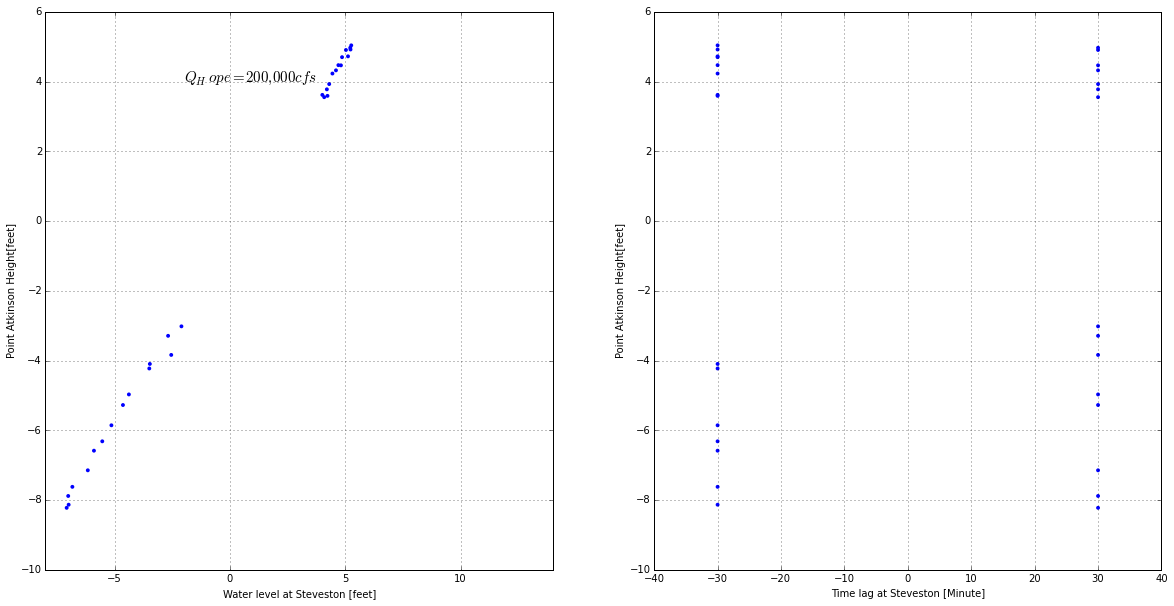

In [56]:
fig = plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, 'Steveston')

* I set the grid point at Steveston as jetty, so I select (428, 291) grid point roughly as Steveston.

* Edge of new river channel model domain

In [57]:
## grid cell for edge of new river treatment is [151, 136]
mima, mimi, tmima, tmimi = readoff_stn_highlow_waterlevel_new(t_end, t_orig, 151, 136,ssh_mod, tt)

In [58]:
##combine both max and min water level for edge of model domain
ssh_model = []
ssh_model.append(mima)
ssh_model.append(mimi)

In [59]:
df = print_out_diff_wl(mima, mimi)
df

[8.483200512454891,
 9.8438289143594861,
 10.635017410038024,
 10.737338521349148,
 10.749900571786824,
 10.881582935025371,
 10.121157319526972,
 9.1795888277176481,
 7.9769342942187791,
 6.5096603642924249,
 6.6027018361360685,
 7.1681245154361397,
 7.594502249884167,
 7.9542301653877008,
 8.4318650832639275]

In [60]:
## average, max and min of the tidal amplitude at edge of model domain 
ddf = np.array(df)
mean_ddf_ST = np.mean(ddf)* 0.3048
max_ddf_ST = np.max(ddf)* 0.3048
min_ddf_ST = np.min(ddf)* 0.3048
print ('Max amplitude of model: {0:.4}'.format(max_ddf_ST))
print ('Min amplitude of model: {0:.4}'.format(min_ddf_ST))
print ('Mean amplitude of model: {0:.4}'.format(mean_ddf_ST))

Max amplitude of model: 3.317
Min amplitude of model: 1.984
Mean amplitude of model: 2.7


In [61]:
delta_max, delta_min = get_time_lag(tmimi, time_min, tmima, time_max)

In [62]:
delta_max

[90, 30, 30, 90, 30, 30, 90, 30, 90, 30, 90, 90, 90, 90, 90]

In [63]:
delta_min

[210, 210, 150, 90, 210, 150, 150, 150, 90, 90, 150, 150, 210, 150, 150]

In [64]:
##combine both time lag for high and low water level at edge of model domain
time_lag_mod = []
time_lag_mod.append(delta_max)
time_lag_mod.append(delta_min)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


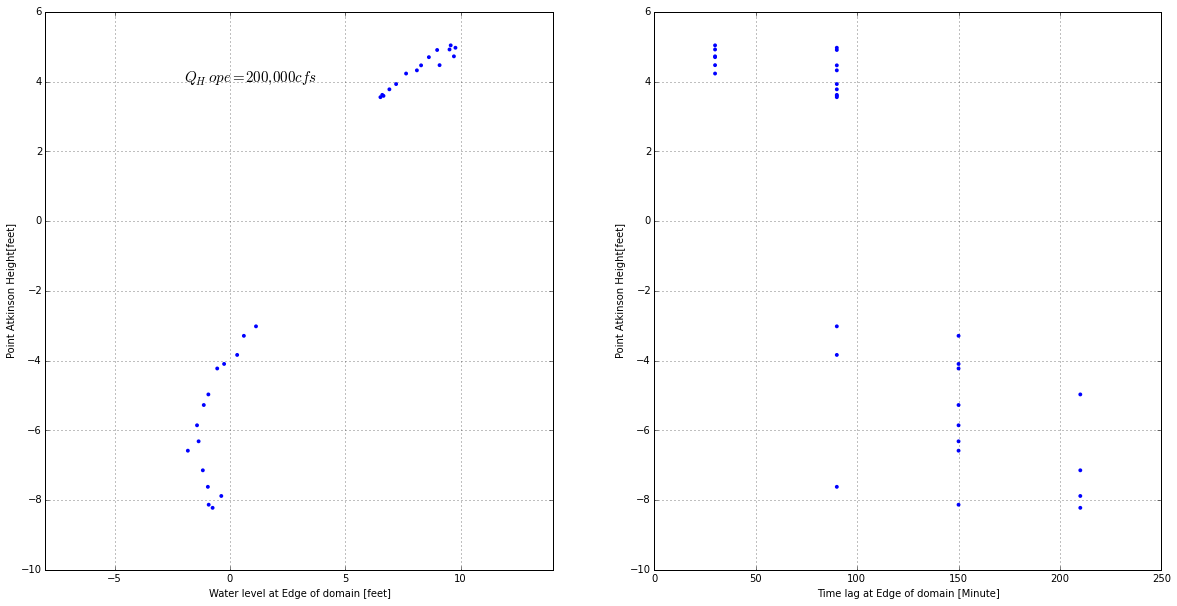

In [65]:
fig = plot_height_time_stn(ssh_model, ssh_obs, time_lag_mod, 'Edge of domain')

* Overall, with jetty in the model, the tidal heights along Fraser station are even higher.